In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [2]:
def soft_max(x):
    exponent= np.exp(x)
    sm=exponent/np.sum(exponent)
    return sm

In [33]:
#Making the datasets
centers=[[-5,2],[3,1],[8,9]]
x_train, y_train= make_blobs(n_samples=200, centers=centers, cluster_std=1, random_state=30)

In [34]:
scaler=StandardScaler()
scaler.fit_transform(x_train)

array([[ 0.719807  ,  2.30270997],
       [ 0.23534718, -0.74200377],
       [ 0.0041337 , -0.44665622],
       [ 0.23295096, -0.56095084],
       [ 1.36912774,  1.33595917],
       [ 0.11688278, -0.43299151],
       [ 0.28626174, -0.88961741],
       [ 0.3724317 , -1.04619475],
       [ 1.28089868,  1.84598364],
       [ 0.3175386 , -0.22656847],
       [ 1.11642124,  1.31968274],
       [-1.57676363, -0.67537458],
       [ 1.18528863,  1.39222373],
       [ 0.36266403, -1.01425556],
       [-1.37658734, -0.36001531],
       [-0.02727553, -1.21602359],
       [ 0.15085655, -0.88036493],
       [ 0.08834164, -0.68465297],
       [ 0.12960983, -0.50698143],
       [ 0.12596355, -0.82972711],
       [ 1.1452407 ,  1.58066101],
       [-1.11088973, -0.79527251],
       [ 1.11427884,  1.13350689],
       [ 0.0577127 , -0.84883022],
       [ 1.31146969,  1.21104605],
       [-1.27424433, -0.81221164],
       [ 0.87563999,  1.47331872],
       [-1.51686825, -0.2731709 ],
       [ 1.07694764,

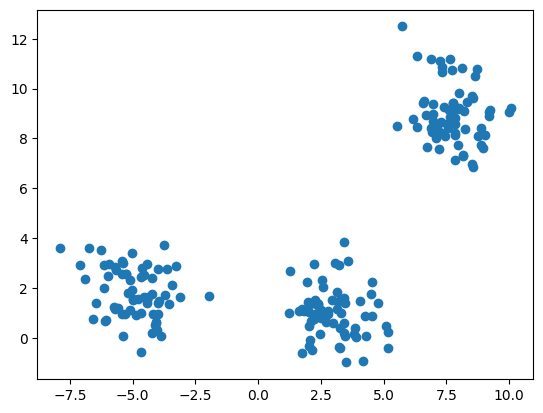

In [17]:
plt.scatter(x_train[:,0],x_train[:,1])
plt.show()

In [18]:
#The Obvious Way

model=Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='softmax')
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

model.fit(x_train,y_train,epochs=40)

Epoch 1/40
7/7 [==============================] - 0s 1ms/step - loss: 1.5287
Epoch 2/40
7/7 [==============================] - 0s 1ms/step - loss: 0.3102
Epoch 3/40
7/7 [==============================] - 0s 1ms/step - loss: 0.1410
Epoch 4/40
7/7 [==============================] - 0s 1ms/step - loss: 0.0876
Epoch 5/40
7/7 [==============================] - 0s 879us/step - loss: 0.0632
Epoch 6/40
7/7 [==============================] - 0s 889us/step - loss: 0.0535
Epoch 7/40
7/7 [==============================] - 0s 927us/step - loss: 0.0513
Epoch 8/40
7/7 [==============================] - 0s 877us/step - loss: 0.0347
Epoch 9/40
7/7 [==============================] - 0s 885us/step - loss: 0.0381
Epoch 10/40
7/7 [==============================] - 0s 965us/step - loss: 0.0285
Epoch 11/40
7/7 [==============================] - 0s 919us/step - loss: 0.0190
Epoch 12/40
7/7 [==============================] - 0s 942us/step - loss: 0.0136
Epoch 13/40
7/7 [==============================] - 0s 891

In [19]:
model.predict(x_train)

7/7 [==============================] - 0s 855us/step


array([[2.11465645e-09, 8.24786912e-06, 9.99991775e-01, 1.40220377e-10],
       [4.74297894e-06, 9.99819934e-01, 1.54418318e-04, 2.10139006e-05],
       [1.25039631e-04, 9.97785568e-01, 1.90881442e-03, 1.80606716e-04],
       [8.50704964e-06, 9.99237895e-01, 7.23277626e-04, 3.03896468e-05],
       [7.78856007e-11, 9.20248713e-05, 9.99907970e-01, 6.43921930e-11],
       [4.39869109e-05, 9.97936010e-01, 1.93310797e-03, 8.70157892e-05],
       [2.86839486e-06, 9.99918699e-01, 6.58268837e-05, 1.26745626e-05],
       [1.19721449e-06, 9.99965072e-01, 2.77872277e-05, 5.94634093e-06],
       [2.31941012e-11, 5.42150565e-06, 9.99994636e-01, 8.00744540e-12],
       [1.78845239e-05, 9.86990511e-01, 1.29561061e-02, 3.55117008e-05],
       [8.75301887e-10, 2.28225370e-04, 9.99771774e-01, 5.43435408e-10],
       [1.00000000e+00, 1.14006971e-09, 6.12902173e-09, 1.04900666e-08],
       [3.33505251e-10, 1.15334093e-04, 9.99884605e-01, 2.05217524e-10],
       [1.28723605e-06, 9.99961615e-01, 3.07923910e

In [21]:
#The Preferred Way

model_p=Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='linear')
    ]
)

model_p.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)

)

model_p.fit(x_train,y_train,epochs=40)

Epoch 1/40
7/7 [==============================] - 0s 1ms/step - loss: 1.0757
Epoch 2/40
7/7 [==============================] - 0s 906us/step - loss: 0.4018
Epoch 3/40
7/7 [==============================] - 0s 1ms/step - loss: 0.2434
Epoch 4/40
7/7 [==============================] - 0s 853us/step - loss: 0.1067
Epoch 5/40
7/7 [==============================] - 0s 1ms/step - loss: 0.0672
Epoch 6/40
7/7 [==============================] - 0s 1ms/step - loss: 0.0612
Epoch 7/40
7/7 [==============================] - 0s 956us/step - loss: 0.0650
Epoch 8/40
7/7 [==============================] - 0s 932us/step - loss: 0.0456
Epoch 9/40
7/7 [==============================] - 0s 946us/step - loss: 0.0338
Epoch 10/40
7/7 [==============================] - 0s 940us/step - loss: 0.0274
Epoch 11/40
7/7 [==============================] - 0s 909us/step - loss: 0.0231
Epoch 12/40
7/7 [==============================] - 0s 981us/step - loss: 0.0207
Epoch 13/40
7/7 [==============================] - 0s 925

In [24]:
logit=model_p.predict(x_train)

7/7 [==============================] - 0s 667us/step


In [25]:
output=tf.nn.softmax(logit).numpy()
output

array([[1.78273382e-07, 6.84233237e-06, 9.99993086e-01, 7.85051885e-12],
       [1.48441700e-06, 9.99986529e-01, 7.04922559e-06, 4.94090409e-06],
       [1.97654066e-04, 9.98525321e-01, 1.03129970e-03, 2.45836505e-04],
       [7.03569640e-06, 9.99908924e-01, 7.27343649e-05, 1.12748057e-05],
       [2.70019314e-08, 5.60779663e-05, 9.99943972e-01, 1.69722157e-12],
       [7.24702331e-05, 9.99109328e-01, 7.46588281e-04, 7.16141076e-05],
       [2.34117650e-07, 9.99997735e-01, 7.74264436e-07, 1.27198211e-06],
       [2.27280292e-08, 9.99999642e-01, 5.95241865e-08, 2.05375372e-07],
       [8.98027785e-09, 2.40681629e-06, 9.99997616e-01, 1.45879375e-13],
       [5.54152648e-05, 9.95366335e-01, 4.56227176e-03, 1.60267064e-05],
       [1.43308569e-07, 6.09983726e-05, 9.99938846e-01, 1.78789258e-11],
       [1.00000000e+00, 1.47616208e-09, 2.59170996e-08, 1.06718923e-09],
       [7.28548386e-08, 3.76617900e-05, 9.99962211e-01, 6.07917276e-12],
       [3.34062236e-08, 9.99999642e-01, 9.51687369e